In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

import emoji
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


In [2]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 4.0 MB/s eta 0:00:00


In [4]:
df=pd.read_csv('Emotions_training.csv')
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


# lower case convertion

use the string in built fucntion "str.lower()" for the text column

In [5]:
#converting to lowercase
df['text']=df['text'].str.lower()

# REMOVING THE LINK

removal of the link using the regular expression of the pattern or starts with http\

In [6]:
#remove links
import re

text = df['text']

def remove_links(text):
    return re.sub(r'http\S+', '', text)

# Apply the function to remove links from each text in the 'text' column
df['text'] = df['text'].apply(remove_links)

# Remove next lines (\n)

In [7]:
#"\n" refers to the next line and by replacing the "\n" with empty string
df['text'] = df['text'].str.replace('\n', '')

# Removal of Numbers

In [8]:
#remove words containing numbers
text=df['text']
def remove_words_with_numbers(text):
    words = text.split()
    clean_words = []
    for word in words:
        has_digit = False
        for char in word:
            if char.isdigit():
                has_digit = True
                break
        if not has_digit:
            clean_words.append(word)  # If the word does not contain any digit, add it to the clean words list
    return' '.join(clean_words)  # Join the clean words list back to string
df['text'] = df['text'].apply(remove_words_with_numbers)


# REMOVE whitespaces

In [9]:
#strip() function used to remove trailing whitespaces
df['text'] = df['text'].str.strip()

# REMOVE Special characters and EMOJIS

In [10]:
#remove special characters
def remove_special_characters(text):
    special_characters = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"
    for char in special_characters:
        text = text.replace(char, '')
    return text

df['text'] = df['text'].apply(remove_special_characters)

In [11]:


# Assuming 'df' is your DataFrame with a 'content' column containing text with emojis
text = df['text']

# Define a function to remove emojis
def remove_emojis(text):
    return emoji.demojize(text)

# Applying remove_emojis() function to each element of the 'content' column
text_without_emojis = text.apply(remove_emojis)



# Removal of stop words using gensim library

**Gensim, a popular Python library for topic modeling and natural language processing, offers the remove_stopwords function to eliminate common stopwords from text data. By invoking this function, you can efficiently preprocess text by removing irrelevant words like "the," "is," and "and," facilitating downstream analysis tasks such as text classification or topic modeling.

In [12]:
from gensim.parsing.preprocessing import preprocess_string
df['text'] = [' '.join(preprocess_string(text)) for text in df['text']]


# Stemming

**Stemming is a natural language processing technique used to reduce words to their root or base form, enabling normalization and simplification of text data. It helps in improving text analysis tasks such as information retrieval, sentiment analysis, and topic modeling by treating variations of words as a single entity. Popular stemming algorithms include Porter Stemmer, Snowball Stemmer, and Lancaster Stemmer.

In [13]:



#Tokenization is the process of breaking down a text or document into smaller units

ps = PorterStemmer() #PorterStemmer is used for stemming, which is the process of reducing words to their base or root form


def stem_sentence(sentence):
    words = word_tokenize(sentence)
    stemmed_words = [ps.stem(word) for word in words]
    return ' '.join(stemmed_words)


df['text'] = df['text'].apply(stem_sentence)



LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


# difference between stemming and lemitizing
**Stemming involves stripping affixes from words to get to the root form. It's done using simple and fast heuristic algorithms, which may result in the stem not being a valid word. For example, "running" would be stemmed to "run".

**Lemmatization, on the other hand, considers the context and meaning of the word along with its morphology to reduce it to its base or dictionary form (lemma). It often requires more computational resources and linguistic knowledge but results in valid words.

# LEMITIZING

Lemmatization is a linguistic process used to reduce words to their base or canonical form, known as the lemma, by considering the word's meaning and context. Unlike stemming, which simply removes suffixes or prefixes, lemmatization ensures that the resulting word is a valid one found in the language's dictionary.

In [19]:
#lemitizing
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import nltk
nltk.download('punkt')



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()


def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens] #lemmatize each token in the list of tokens
    return ' '.join(lemmatized_tokens)


df['text'] = df['text'].apply(lemmatize_text)

**this below code helps in adding the different label classes into the respective arrays created for each labels
and the displaying the count of each classes/label-0,1,2,3,4,5 that is sadness,joy,love,anger,fear and surprise

In [21]:
count = df['text'].count()# total count of the data/sample in the dataset
label=df['label']
text=df['text']
#creating the empty arrays
label0 = []
label1 = []
label2 = []
label3 = []
label4 = []
label5 = []
#this for loop helps in appending the each sample/data into the respective labels array based on the if conditions
for i in range(count):
    if label[i] == 0:
        label0.append(text[i])
    elif label[i] == 1:
        label1.append(text[i])
    elif label[i] == 2:
        label2.append(text[i])
    elif label[i] == 3:
        label3.append(text[i])
    elif label[i] == 4:
        label4.append(text[i])

    elif label[i]==5:
        label5.append(text[i])
    else:
        pass
#displaying the length of each labels
print("the count of sadness is:",len(label0))
print("the count of joy is:",len(label1))
print("the count of love is:",len(label2))
print("the count of anger is:",len(label3))
print("the count of fear is:",len(label4))
print("the count of surprise is :",len(label5))

the count of sadness is: 4666
the count of joy is: 5362
the count of love is: 1304
the count of anger is: 2159
the count of fear is: 1937
the count of surprise is : 572


**percentage of each  label in the dataset

In [22]:
#individual percentage
l0=(len(label0)/count)*100
l1=(len(label1)/count)*100
l2=(len(label2)/count)*100
l3=(len(label3)/count)*100
l4=(len(label4)/count)*100
l5=(len(label5)/count)*100
print(f"the perecentage of leabel\n 0={l0}% \n 1={l1}% \n 2={l2}% \n 3={l3}% \n 4={l4}% \n 5={l5}%")

the perecentage of leabel
 0=29.1625% 
 1=33.5125% 
 2=8.15% 
 3=13.493749999999999% 
 4=12.106250000000001% 
 5=3.5749999999999997%


# BAR graph representation

**this helps to visualize the each label and helps in finding out whether the dataset is imbalanced!

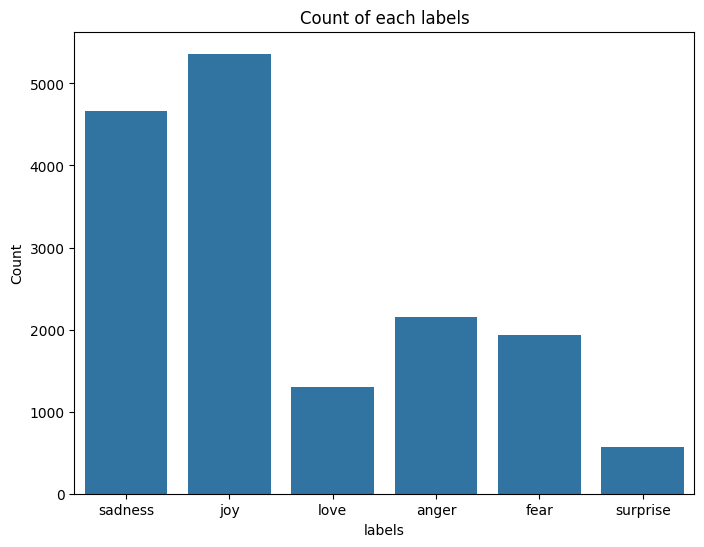

In [23]:


labels = ['sadness', 'joy', 'love', 'anger','fear','surprise']
counts = [len(label0), len(label1), len(label2), len(label3), len(label4),len(label5)]


plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=counts)
plt.title('Count of each labels')
plt.xlabel('labels')
plt.ylabel('Count')
plt.show()


**In the above bar graph it denotes that the text related to the joy-1 is maximum and text related to the surprise  label -5 is minimum

# Balancing the dataset classes

**oversampling is better than under_sampling bcoz there might be some important data misses in the undersample due to less data or reduction od data size in each class

resample module from scikit-learn's utils subpackage provides functions for resampling data, particularly useful for addressing class imbalance in classification tasks. It allows you to randomly oversample minority classes or undersample majority classes to balance the dataset, improving the performance of machine learning models.

label-1 had the maximum samples / text so we have upsampled / increased the all minority classes until it reaches the label-1 sample count

In [24]:



# Count the number of samples in each class
class_counts = df['label'].value_counts()

# target count using maximum count among all the label
target_count = class_counts.max()


resampled_data = []

# Loop through each class
for label in class_counts.index:
    # Extract data for the current class
    class_data = df[df['label'] == label]

    # Upsample (oversample) the class to match the target count
    sampled_data = resample(class_data, replace=True, n_samples=target_count, random_state=42)

    # Append the resampled data to the list
    resampled_data.append(sampled_data)

# Concatenate the resampled data for all classes
balanced_df = pd.concat(resampled_data)

# Displaying the count of samples in each class after balancing the dataset classes
print(balanced_df['label'].value_counts())


label
1    5362
0    5362
3    5362
4    5362
2    5362
5    5362
Name: count, dtype: int64


In [25]:
balanced_df

,text,label
2491,feel glad justic serv west said,1
15585,feel valuabl know consid worth sacrific,1
15488,certainli felt appropri life supplic life life...,1
11161,feel assur futur onlin entertain rest good hand,1
9145,feel thank abl figur wai deal minor effect dealt,1
...,...,...
15825,feel game strang realiti swarm violent carnivo...,5
5319,talk district leader elder hill night explain ...,5
4775,know isnt real feel strang time,5
1756,feel kinda strang caus didnt encount feel year,5


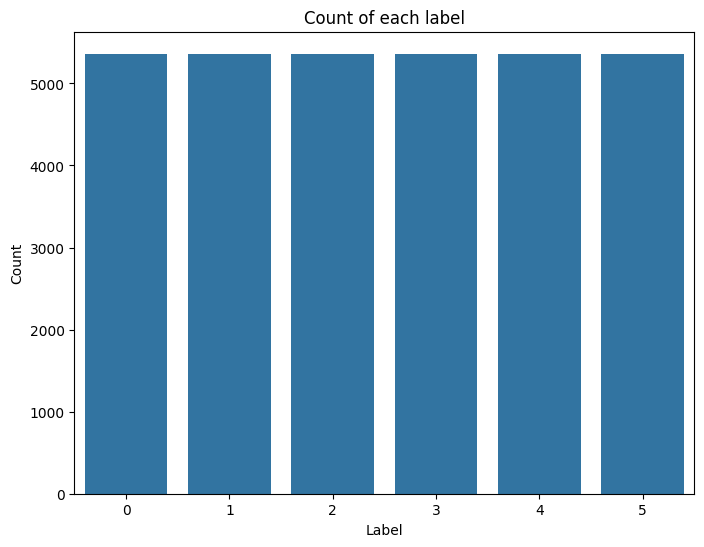

In [26]:
# Plot the count of each label
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=balanced_df)
plt.title('Count of each label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

**vectorization-
Text vectorization converts text data into numerical vectors, representing features such as word frequencies or semantic meanings. This transformation allows machine learning algorithms to process and analyze text, enabling tasks like sentiment analysis

In [40]:


# Handle NaN values by replacing them with an empty string
balanced_df['text'].fillna('', inplace=True)






## SPLITTING OF DATASET INTO TRAIN[70%],TEST[20%] AND VALIDATE [10%] DATASET

In [28]:




# Define the features (X) and target (y)
X = balanced_df['text']
y = balanced_df['label']

# First, split the dataset into Train (70%) and combined Test-Validation (30%)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, split the combined Test-Validation set into Test (20%) and Validation (10%)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=1/3, random_state=42)


**X_train: Contains the text data for training.
y_train: Contains the corresponding labels for the training data.
X_test_val: Contains the text data for both the test and validation sets.
y_test_val: Contains the corresponding labels for both the test and validation sets.
test_size=0.3 means 30% of the data will be allocated to the test

# RANDOM FOREST

**Random Forest is a popular ensemble learning algorithm that builds multiple decision trees during training and combines their predictions through voting or averaging. It's robust against overfitting, capable of handling large datasets with high dimensionality

**STEPS OF RANDOM FOREST
1)Initialize Model: Create a Random Forest classifier object using the RandomForestClassifier class from scikit-learn.
2)Hyperparameter Tuning : Tune the hyperparameters of the Random Forest model using techniques like grid search  to find the best combination of parameters.
3)Train Model: Fit the Random Forest model to the training data using the fit method. This step involves growing multiple decision trees based on bootstrapped samples of the training data and randomly selecting a subset of features at each split.

**code utilizes TF-IDF vectorization to convert text data into numerical features. It limits the number of extracted features to the top 5000 most frequent terms. The training,testing and validating data is fitted to the TF-IDF vectorizer, learning the vocabulary and computing TF-IDF score

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

**The code initializes a Random Forest classifier with 100 decision trees and a fixed random state . It then fits the classifier to the TF-IDF transformed X_train_tfidf and y_train. This process trains the Random Forest model to learn the relationships between the TF-IDF features and their associated labels, helps us to make predictions on new text data

In [31]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

below code provides the 99% accuracy this might be Overfitting: In cases of severe overfitting, a model might perfectly memorize the training data, resulting in high accuracy on the training set but poor generalization to unseen data.

In [33]:
#accuracy of the training dataset
train_predictions = random_forest.predict(X_train_tfidf)
print("Classification Report for Training Dataset:")
print(classification_report(y_train, train_predictions))


Classification Report for Training Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3729
           1       1.00      0.99      1.00      3757
           2       1.00      1.00      1.00      3731
           3       1.00      1.00      1.00      3743
           4       1.00      0.99      1.00      3775
           5       1.00      1.00      1.00      3785

    accuracy                           1.00     22520
   macro avg       1.00      1.00      1.00     22520
weighted avg       1.00      1.00      1.00     22520



Precision: The proportion of true positive predictions out of all positive predictions made by the model. High precision indicates few false positives.
Recall: The proportion of true positive predictions out of all actual positives in the dataset. High recall indicates few false negatives.
F1-score: The harmonic mean of precision and recall, providing a balanced measure of model performance.
Support: The number of actual occurrences of each class in the test dataset.
Accuracy: The proportion of correctly classified instances out of all instances in the test dataset.
Macro Avg: The average of precision, recall, and F1-score across all classes, giving equal weight to each class.
Weighted Avg: The weighted average of precision, recall, and F1-score, weighted by the number of instances in each class.

## overfitting:Overfitting occurs when a machine learning model learns to capture noise or irrelevant patterns in the training data, resulting in poor generalization to new, unseen data.

**classification report for the test dataset where it provides 84% of accuracy.

In [34]:
#Generate classification report for test dataset
test_predictions = random_forest.predict(X_test_tfidf)
print("\nClassification Report for Test Dataset:")
print(classification_report(y_test, test_predictions))



Classification Report for Test Dataset:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1097
           1       0.97      0.90      0.94      1104
           2       0.93      1.00      0.96      1069
           3       0.96      0.97      0.96      1053
           4       0.96      0.97      0.97      1054
           5       0.97      1.00      0.98      1057

    accuracy                           0.96      6434
   macro avg       0.96      0.96      0.96      6434
weighted avg       0.96      0.96      0.96      6434



## CONFUSION MATRIX

In [36]:
#confusion matrix for training dataset

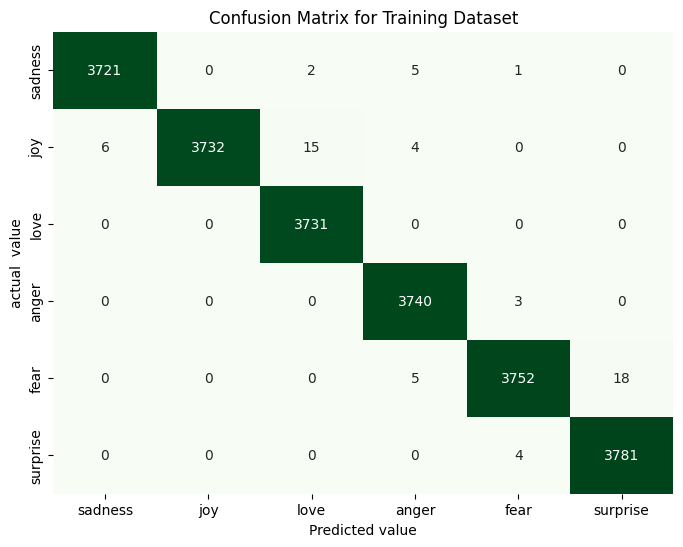

In [37]:

# Calculate confusion matrix
conf_matrix_train = confusion_matrix(y_train, train_predictions)

# Define emotion labels
emotion_labels = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

# Plot confusion matrix as a heatmap\
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=[emotion_labels[i] for i in range(conf_matrix_train.shape[1])],
            yticklabels=[emotion_labels[i] for i in range(conf_matrix_train.shape[0])])# this is to modify the labels with sadness,joy,love,fear,surprise labels
plt.title('Confusion Matrix for Training Dataset')
plt.xlabel('Predicted value')
plt.ylabel('actual  value')
plt.show()


model appears to perform well at classifying sadness and joy, with 3227 and 3767 correctly classified instances respectively.
the model as the predicted value as sadness but actual value is joy with 6 wrongly classified in this case
the model as the predicted value as love but actual value is joy with 8 wrongly classified in this case this is.
model appears to least  in classifying the surprise label that is 390.
note:this is actually overfitting model  confusion matrix of training dataset.
in further i have applied hyperparameter tunning using grid search to get the optimal solution.


**confusion matrix of the  testing dataset.

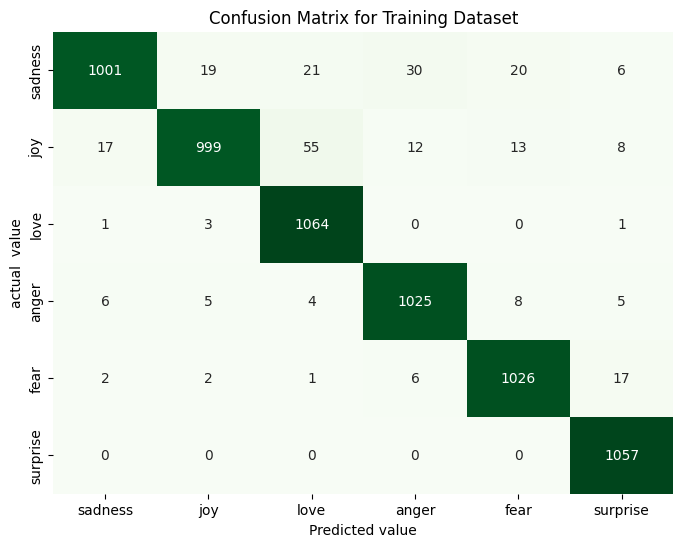

In [38]:

# Calculate confusion matrix
conf_matrix_train = confusion_matrix(y_test, test_predictions)

# Define emotion labels
emotion_labels = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

# Plot confusion matrix as a heatmap with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=[emotion_labels[i] for i in range(conf_matrix_train.shape[1])],
            yticklabels=[emotion_labels[i] for i in range(conf_matrix_train.shape[0])])
plt.title('Confusion Matrix for Training Dataset')
plt.xlabel('Predicted value')
plt.ylabel('actual  value')
plt.show()


In this testing dataset
the confusion matrix the model appears to perform well at classifying sadness and joy
same as the training dataset the least perfromed for the label surprise -87 following by label love -172
the predicted value is joy and actual value is love which is wrongly classified that is  104 which is hight in number .
following with anger and sadness that is 47.

## GridSearch

**GridSearchCV automates the process of hyperparameter tuning by exhaustively searching through a predefined grid of hyperparameters and evaluating each combination using cross-validation. It selects the best combination based on the performance metric specified and trains the final model using these optimal hyperparameters. This approach streamlines the hyperparameter tuning process and helps improve the model's performance without manual trial and error.

**Cross-validation is a technique used to evaluate machine learning models by partitioning the dataset into subsets, training the model on a portion of the data, and then evaluating it on the remaining portion. It helps estimate a model's performance, detect overfitting, and assess its ability to generalize to unseen data.

**1)n_estimators: Number of decision trees in the random forest ensemble, with options of 50 or 100 trees.
2)max_depth: Maximum depth of each decision tree, with choices of unlimited depth or a maximum of 5 levels.
3)min_samples_split: Minimum number of samples required to split an internal node, with options of 2 or 3 samples.
4)min_samples_leaf: Minimum number of samples required at a leaf node, with choices of 1 or 2 samples.
5)max_features: Number of features to consider for the best split, with options of considering all features ('auto') or the square root of total features ('sqrt').

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Define a reduced parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Perform Grid Search Cross-Validation with the reduced parameter grid
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit grid search on the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters found by Grid Search
best_params = grid_search.best_params_

# Print the best parameters found by Grid Search
print("Best Parameters:", best_params)

# Create a new Random Forest classifier with the best parameters
best_random_forest = RandomForestClassifier(**best_params, random_state=42)

# Train the model with the best parameters on the full training set
best_random_forest.fit(X_train_tfidf, y_train)

# Make predictions on the training set
train_predictions = best_random_forest.predict(X_train_tfidf)
test_predictions = best_random_forest.predict(X_test_tfidf)

#  classification report for training dataset
print("\nClassification Report for Training Dataset:")
print(classification_report(y_train, train_predictions))

#  classification report for test dataset
print("\nClassification Report for Test Dataset:")
print(classification_report(y_test, test_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Classification Report for Training Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3729
           1       1.00      0.99      1.00      3757
           2       1.00      1.00      1.00      3731
           3       1.00      1.00      1.00      3743
           4       1.00      0.99      1.00      3775
           5       1.00      1.00      1.00      3785

    accuracy                           1.00     22520
   macro avg       1.00      1.00      1.00     22520
weighted avg       1.00      1.00      1.00     22520


Classification Report for Test Dataset:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1097
           1       0.97      0.90      0.93      1104
           2       0.93      0.99      0.96      1069
           3       0.96      0.97      0.96      1053
           4       0.96      0.97      0.97      1054
           5       0.97      1.00      0.98   

**accuracy of the training dataset

In [42]:
from sklearn.metrics import accuracy_score

# Train the model with the best parameters found by Grid Search on the full training set
best_random_forest.fit(X_train_tfidf, y_train)

# Make predictions on the training set using the trained model
train_predictions_best = best_random_forest.predict(X_train_tfidf)

# Calculate accuracy of the training set predictions
accuracy_train_best = accuracy_score(y_train, train_predictions_best)

#  the accuracy of the training dataset after grid search
print("Accuracy of Training Dataset after Grid Search:", accuracy_train_best)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of Training Dataset after Grid Search: 0.997158081705151


## confusion matrix of the training dataset after GridSearchCv.

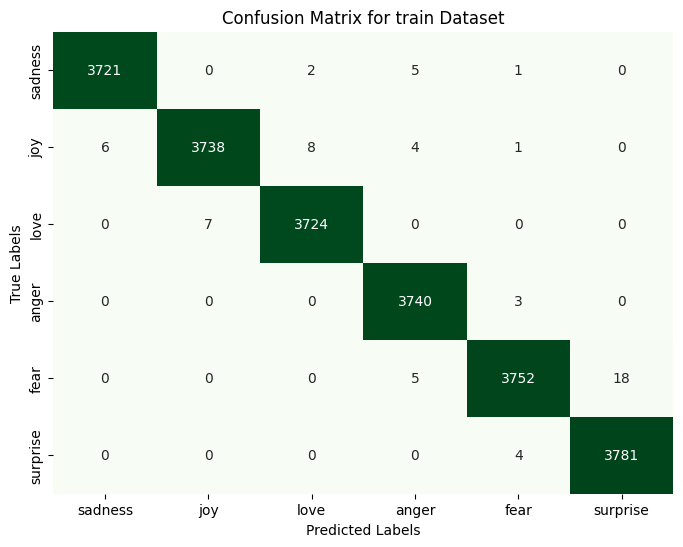

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the test set using the trained model
test_predictions = best_random_forest.predict(X_train_tfidf)

# Calculate confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_train, train_predictions)

# Print confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=[emotion_labels[i] for i in range(conf_matrix_test.shape[1])],
            yticklabels=[emotion_labels[i] for i in range(conf_matrix_test.shape[0])])
plt.title('Confusion Matrix for train Dataset')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate accuracy of the test set predictions
accuracy_train = accuracy_score(y_train, train_predictions)



model appears good performance  on the sadness and joy labels  that is 3017 and 3450
it performed least on surprise label
and miss classified with high number for predicted value joy and actual value is love thay is 191.

## SVM

**Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It aims to find the optimal hyperplane that separates data points into different classes while maximizing the margin between classes. SVM employs the kernel trick to handle non-linear decision boundaries efficiently. The algorithm's performance is controlled by parameters like the C parameter, which balances margin width and classification error

In [ ]:
""""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix




y_train = X_train['label']
y_test = X_test['label']

# Step 3: Build SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 4: Generate classification report for training dataset
train_predictions = svm_classifier.predict(X_train)
print("Classification Report for Training Dataset:")
print(classification_report(y_train, train_predictions))


# Step 5: Generate classification report for test dataset
test_predictions = svm_classifier.predict(X_test)
print("\nClassification Report for Test Dataset:")
print(classification_report(y_test, test_predictions))

""""